In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from MLP import *

In [6]:
digits = load_digits()
X = digits.data
Y = digits.target
Y = np.eye(10)[Y]

# encoder = OneHotEncoder()
# Y = encoder.fit_transform(Y)

# decoded_data = encoder.inverse_transform(encoded_data)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size=0.25, random_state=42)

print(f'Train: {X_train.shape}, {Y_train.shape}')
print(f'Validation: {X_validation.shape}, {Y_validation.shape}')
print(f'Test: {X_test.shape}, {Y_test.shape}')

Train: (1437, 64), (1437, 10)
Validation: (90, 64), (90, 10)
Test: (270, 64), (270, 10)


In [8]:
model = MultiLayerPerceptron(64, 10, .001)

epochs = 50

train_total_losses = []
train_total_accuracies = []
validation_total_losses = []
validation_total_accuracies = []

for epoch in range(epochs):

    train_losses = []
    train_accuracies = []

    validation_losses = []
    validation_accuracies = []

    # Train
    for x, y in zip(X_train, Y_train):
        x = x.reshape(-1, 1).T

        output = model.forward(x)

        model.backward(x, y, output)

        model.update()

        train_accuracies.append(accuracy(output, y))
        train_losses.append(RMSD(output, y))

    # Validation
    for x, y in zip(X_validation, Y_validation):
        x = x.reshape(-1, 1).T

        output = model.forward(x)

        validation_accuracies.append(accuracy(output, y))
        validation_losses.append(RMSD(output, y))

    train_total_loss = np.mean(train_losses)
    train_total_accuracy = np.mean(train_accuracies)

    validation_total_loss = np.mean(validation_losses)
    validation_total_accuracy = np.mean(validation_accuracies)

    print(f'Epoch: {epoch + 1}')
    print(f"Train: Loss {train_total_loss}, Accuracy: {train_total_accuracy}")
    print(f"Validation: Loss {validation_total_loss}, Accuracy: {validation_total_accuracy}")

    train_total_losses.append(train_total_loss)
    train_total_accuracies.append(train_total_accuracy)
    validation_total_losses.append(validation_total_loss)
    validation_total_accuracies.append(validation_total_accuracy)

Epoch: 1
Train: Loss 0.29558551026971364, Accuracy: 0.2985386221294363
Validation: Loss 0.25181681758123226, Accuracy: 0.43333333333333335
Epoch: 2
Train: Loss 0.20665158873707054, Accuracy: 0.5511482254697286
Validation: Loss 0.19458727327269038, Accuracy: 0.5666666666666667
Epoch: 3
Train: Loss 0.15674683193789293, Accuracy: 0.6889352818371608
Validation: Loss 0.16521777236732743, Accuracy: 0.6444444444444445
Epoch: 4
Train: Loss 0.12896061609135048, Accuracy: 0.7724425887265136
Validation: Loss 0.15738022960295145, Accuracy: 0.6777777777777778
Epoch: 5
Train: Loss 0.1110537685686822, Accuracy: 0.8002783576896312
Validation: Loss 0.14795920362609014, Accuracy: 0.6888888888888889
Epoch: 6
Train: Loss 0.09922006671547692, Accuracy: 0.8364648573416841
Validation: Loss 0.1387764632382456, Accuracy: 0.7111111111111111
Epoch: 7
Train: Loss 0.08978997806081213, Accuracy: 0.8608211551844119
Validation: Loss 0.13170031924567532, Accuracy: 0.7222222222222222
Epoch: 8
Train: Loss 0.082113822308

In [9]:
# Test
test_losses = []
test_accuracies = []

for x, y in zip(X_test, Y_test):
    x = x.reshape(-1, 1).T

    output = model.forward(x)

    test_accuracies.append(accuracy(output, y))
    test_losses.append(RMSD(output, y))
print(f"Test: Loss {np.mean(test_losses)}, Accuracy: {np.mean(test_accuracies)}")

Test: Loss 0.07259728231787792, Accuracy: 0.8666666666666667


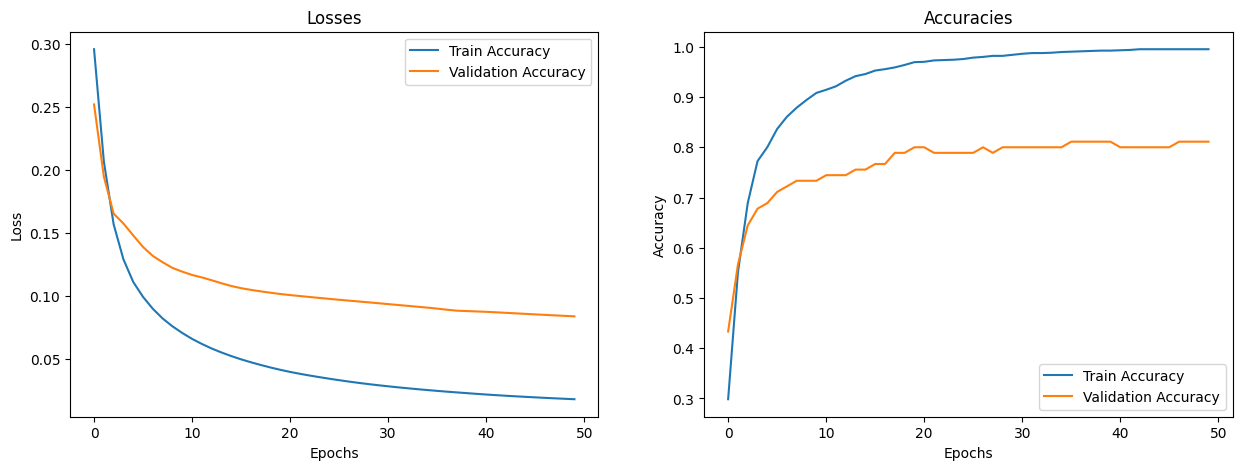

In [13]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

plt.title('MNIST with MLP')

ax_1.plot(train_total_losses, label='Train Accuracy')
ax_1.plot(validation_total_losses, label='Validation Accuracy')
ax_1.legend()
ax_1.set_title("Losses")
ax_1.set_xlabel("Epochs")
ax_1.set_ylabel("Loss")

ax_2.plot(train_total_accuracies, label='Train Accuracy')
ax_2.plot(validation_total_accuracies, label='Validation Accuracy')
ax_2.legend()
ax_2.set_title("Accuracies")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("Accuracy")

plt.show()

In [14]:
import cv2 as cv


def predict(file_name):
    image = cv.imread(file_name)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = image.astype(np.float32)

    x = image.reshape(-1, 1).T

    output = model.forward(x)

    return np.argmax(output)

In [17]:
print(predict('inputs/5.png'))
print(predict('inputs/7.png'))
print(predict('inputs/2.png'))

4
7
2
